In [12]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

from utilities import load_image, resize_image
from noise_image import NoiseImage
import numpy as np

### Add "analog" noise to an image

In [78]:
im = load_image('example_images/pixabay_zebra.jpeg',True)
n = NoiseImage(im, ksize=5)
n.process()

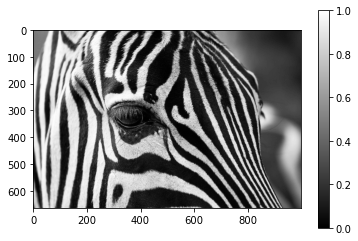

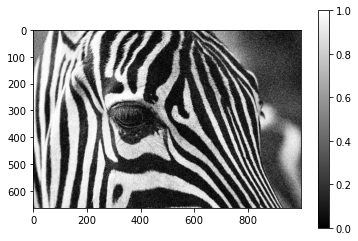

In [79]:
%matplotlib inline
plt.imshow(im/255,cmap='gray',vmin=0,vmax=1)
plt.colorbar()
plt.show()
plt.imshow(n.output_raw_noise(),cmap='gray',vmin=0,vmax=1)
plt.colorbar()
plt.show()


### Save it with different noise levels

In [45]:
for l in [0.2,0.5,1]:
    plt.imsave('example_outputs/zebra'+str(l)+'.jpg',n.output_mix(l),cmap='gray')

### Live noise preview

In [16]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.1)


mask = resize_image(n.output_raw_noise(),im.shape)

im1 = ax.imshow(mask,cmap='gray')

axcolor = 'lightgoldenrodyellow'
axmax  = fig.add_axes([0.25, 0, 0.65, 0.03])

smax = Slider(axmax, 'mix', 0, 1, valinit=1)

def update(val):
    mix = n.output_mix(val)
    im1.set_array(mix)
    fig.canvas.draw()
smax.on_changed(update)

plt.show()


### Comparison with other random noises

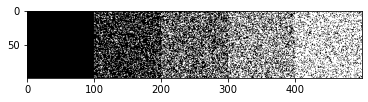

In [76]:

# test noise
im=np.zeros((100,500))
for i in range(5):
    im[:,100*i:100*(i+1)]=i/5

def add_noise(im):
    out = im.copy()
    n,m = out.shape
    for i in range(n):
        for j in range(m):
            # out[i,j]=im[i,j]*255 + np.random.randn()*30
            out[i,j]=np.random.binomial(1,im[i,j])*255

    return out

b = add_noise(im)
plt.imshow(b,cmap='gray')
plt.show()
# plt.imsave('film_grains/bernouilli.jpg',b,cmap='gray',vmin=0,vmax=255)